### Script for Plotting Logos

This notebook contains all the necessary code to generate logo plots for barcodes and fragments across all libraries. 

These visualizations can be used to:
- Assess the quality of barcodes.
- Examine the structural patterns of fragments within different libraries.


In [40]:
from Bio import SeqIO

# Define the input file (regular FASTQ, not gzipped)
library = "p007"
input_file = f"/lunarc/nobackup/projects/lu2024-17-19/J_rAAven/BRAVE/raav-60/{library}/barcode_fragment/unique_fragments.fasta"

# Extract sequences
sequences = []
with open(input_file, "r") as handle:  # Use open instead of gzip.open
    for record in SeqIO.parse(handle, "fasta"):
        sequences.append(str(record.seq))
        
# check if all sequences are the same length
lengths = [len(seq) for seq in sequences]
if len(set(lengths)) > 1:
    print("Sequences are not all the same length")
    print("Set all Sequences to the same length")
    max_length = max(lengths)
    sequences = [seq.ljust(max_length, "N") for seq in sequences]
    print("Number of sequences: ", len(sequences))
else:
    print("Number of sequences: ", len(sequences))

Number of sequences:  112383


In [41]:
import pandas as pd

# Convert sequences to a pandas DataFrame with Base counts per position

# Load sequences into a pandas DataFrame
sequence_df = pd.DataFrame([list(seq) for seq in sequences])

# Count occurrences of each nucleotide
counts_df = sequence_df.apply(pd.Series.value_counts).fillna(0)

# Convert counts to a probability matrix
probability_df = counts_df.div(counts_df.sum(axis=0), axis=1)

# transpose the matrix
probability_df = probability_df.T

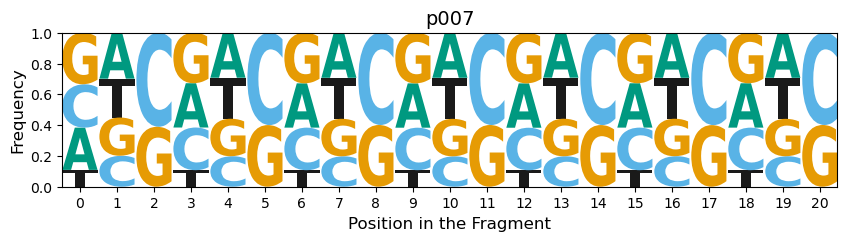

In [42]:
import matplotlib.pyplot as plt
import logomaker

# Create the logo
logo = logomaker.Logo(probability_df, figsize=(10, 2))

# Set colorblind-friendly colors (optional, depends on your data)
# If you want to manually assign a colorblind-friendly palette:
logo.style_glyphs(color_scheme='colorblind_safe')

# Style the ticks
logo.style_xticks(anchor=0, spacing=1)

# Set title and axis labels with larger font sizes
plt.title(f"{library}", fontsize=14)
plt.xlabel("Position in the Fragment", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Make the background transparent
logo.ax.patch.set_alpha(0.0)       # Plot area
logo.fig.patch.set_alpha(0.0)      # Entire figure background

# Save the plot with transparent background
plt.savefig(f"plots/logos/frag_dist_{library}.png", dpi=300, transparent=True)

# Display the plot
plt.show()
